## CS4440 Group project 4
This is the group project on the relation between Hypertension and Stroke.


In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import statistics

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [3]:
path = pathlib.PurePath()
temp = os.path.join(path, 'datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
temp2 = os.path.join(path, 'datasets/diabetes_prediction_dataset.csv')
temp3 = os.path.join(path, 'datasets/combined.csv')
df = pd.read_csv(temp)
df2 = pd.read_csv(temp2)
combined = pd.read_csv(temp3)

C:\Users\Carson\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


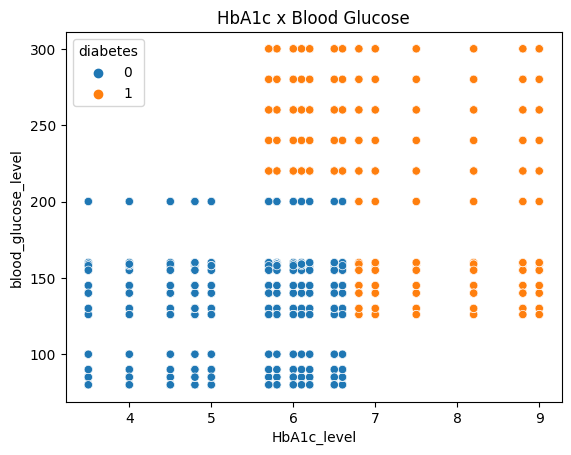

In [64]:
sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data=df2)
plt.title("HbA1c x Blood Glucose")
plt.show()

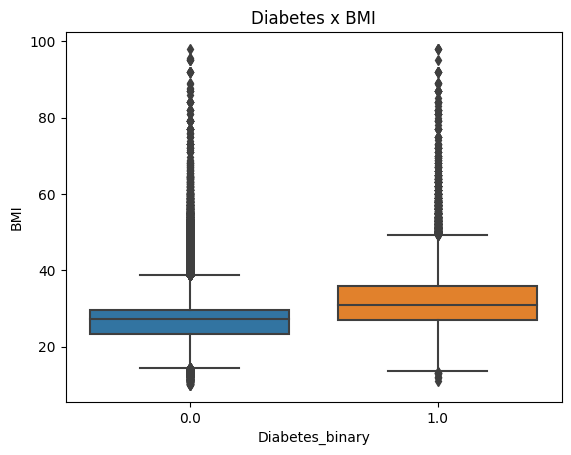

Average BMI of People Without Diabetes: 27.13315721425981
Standard Deviation of People Without Diabetes: 6.334541782853251
Average BMI of People With Diabetes: 31.9526125530265
Standard Deviation of People With Diabetes: 7.401532541622375


In [63]:
sns.boxplot(data=combined, x="Diabetes_binary", y="BMI")
plt.title("Diabetes x BMI")
plt.show()
wo = combined[combined["Diabetes_binary"] == 0]["BMI"]
w = combined[combined["Diabetes_binary"] == 1]["BMI"]

print("Average BMI of People Without Diabetes: " + str(statistics.mean(wo)))
print("Standard Deviation of People Without Diabetes: " + str(statistics.stdev(wo)))
print("Average BMI of People With Diabetes: " + str(statistics.mean(w)))
print("Standard Deviation of People With Diabetes: " + str(statistics.stdev(w)))

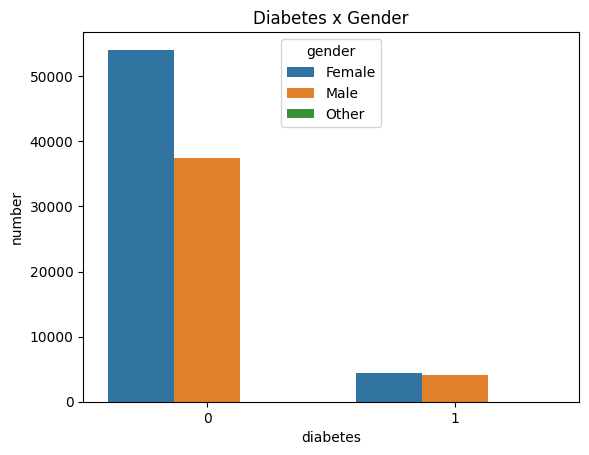

   diabetes  gender  number
0         0  Female   54091
1         0    Male   37391
2         0   Other      18
3         1  Female    4461
4         1    Male    4039
Proportion of Men with Diabetes: 0.10802064667968228
Portion of Women with Diabetes: 0.08247213029894067


In [62]:
gender = df2.groupby(["diabetes", "gender"]).size().reset_index(name="number")
sns.barplot(data=gender, x="diabetes", y="number", hue="gender")
plt.title("Diabetes x Gender")
plt.show()
print(gender)
men = gender.iloc[4]["number"]/gender.iloc[1]["number"]
women = gender.iloc[3]["number"]/gender.iloc[0]["number"]
print("Proportion of Men with Diabetes: " + str(men))
print("Portion of Women with Diabetes: " + str(women))

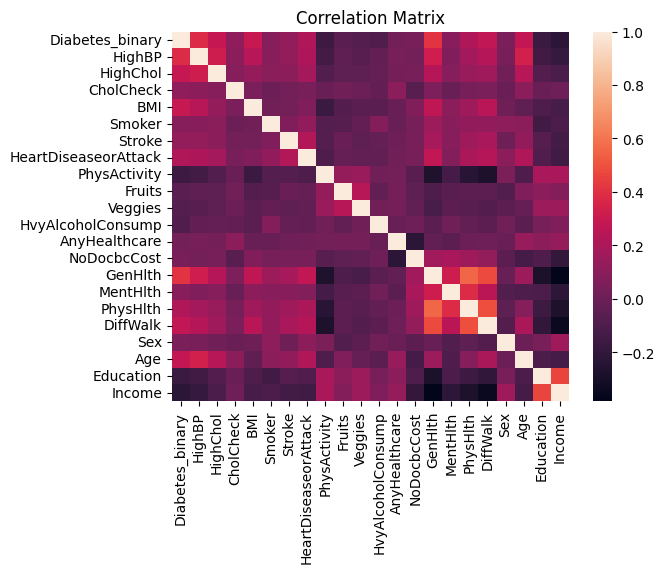

In [67]:
sns.heatmap(df.corr())
plt.title("Correlation Matrix")
plt.show()